#___IMPORTING LIBRARIES AND DATAFRAME___

In [51]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from keras.callbacks import History
from tensorflow.keras import initializers

In [52]:
df1 = pd.read_csv("/content/drive/MyDrive/dataset/mltrain.csv")
df2 = pd.read_csv("/content/drive/MyDrive/dataset/mltest.csv")

#___SHORT EDA___

In [53]:
df1.head()

,PassengerId,Survived,Sex,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Family_size,Title_1,Title_2,Title_3,Title_4,Emb_1,Emb_2,Emb_3
0,1,0,1,0.2750,0.014151,0,0,1,0.1,1,0,0,0,0,0,1
1,2,1,0,0.4750,0.139136,1,0,0,0.1,1,0,0,0,1,0,0
2,3,1,0,0.3250,0.015469,0,0,1,0.0,0,0,0,1,0,0,1
3,4,1,0,0.4375,0.103644,1,0,0,0.1,1,0,0,0,0,0,1
4,5,0,1,0.4375,0.015713,0,0,1,0.0,1,0,0,0,0,0,1


In [54]:
df2.head()

,PassengerId,Survived,Sex,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Family_size,Title_1,Title_2,Title_3,Title_4,Emb_1,Emb_2,Emb_3
0,792,0,1,0.2000,0.050749,0,1,0,0.0,1,0,0,0,0,0,1
1,793,0,0,0.3500,0.135753,0,0,1,1.0,0,0,0,1,0,0,1
2,794,0,1,0.3500,0.059914,1,0,0,0.0,1,0,0,0,1,0,0
3,795,0,1,0.3125,0.015412,0,0,1,0.0,1,0,0,0,0,0,1
4,796,0,1,0.4875,0.025374,0,1,0,0.0,1,0,0,0,0,0,1


In [55]:
c1 = df1.columns
c2 = df2.columns
for i in c1:
  df1[i] = df1[i].astype(float)
for i in c2:
  df2[i] = df2[i].astype(float)

In [56]:
print(c1)

Index(['PassengerId', 'Survived', 'Sex', 'Age', 'Fare', 'Pclass_1', 'Pclass_2',
       'Pclass_3', 'Family_size', 'Title_1', 'Title_2', 'Title_3', 'Title_4',
       'Emb_1', 'Emb_2', 'Emb_3'],
      dtype='object')


In [57]:
df1 = df1.drop(['PassengerId'],axis = 1)
df2 = df2.drop(['PassengerId'],axis = 1)

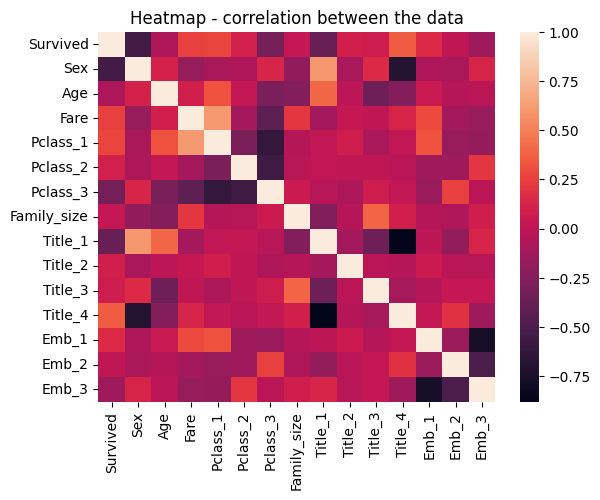

In [59]:
sns.heatmap(df1.corr())
plt.title("Heatmap - correlation between the data")
plt.show()

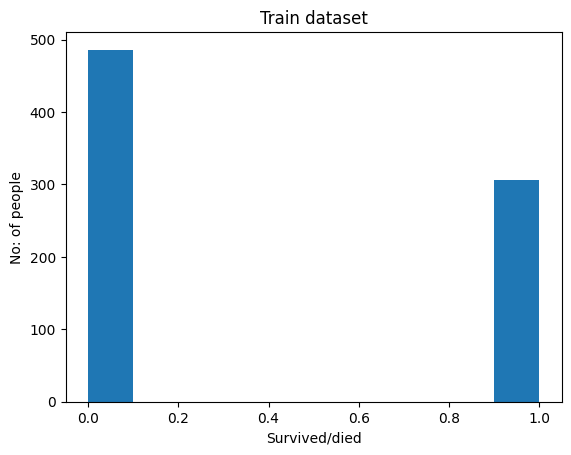

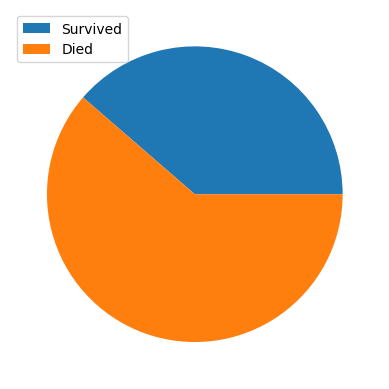

In [60]:
plt.hist(df1["Survived"])
plt.title("Train dataset")
plt.xlabel("Survived/died")
plt.ylabel("No: of people")
plt.show()
plt.pie([np.sum(df1["Survived"]),df1.shape[0]-np.sum(df1["Survived"])])
plt.legend(["Survived","Died"])
plt.show()

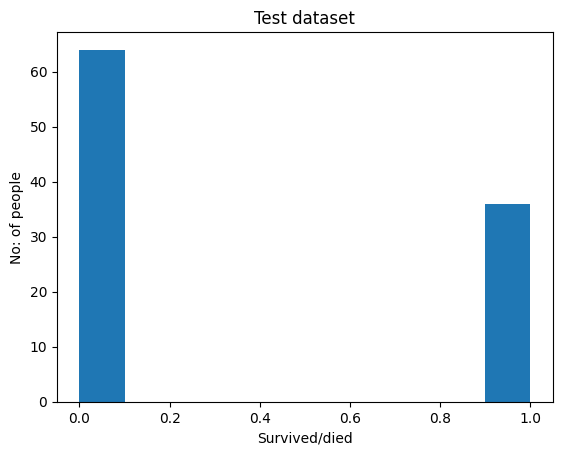

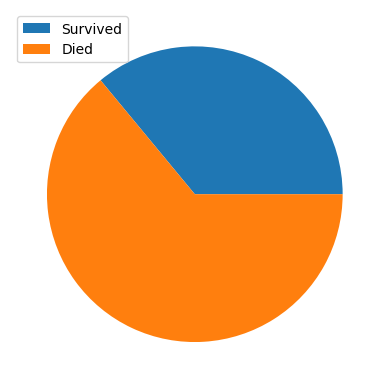

In [61]:
plt.hist(df2["Survived"])
plt.title("Test dataset")
plt.xlabel("Survived/died")
plt.ylabel("No: of people")
plt.show()
plt.pie([np.sum(df2["Survived"]),df2.shape[0]-np.sum(df2["Survived"])])
plt.legend(["Survived","Died"])
plt.show()

In [62]:
df1.columns

Index(['Survived', 'Sex', 'Age', 'Fare', 'Pclass_1', 'Pclass_2', 'Pclass_3',
       'Family_size', 'Title_1', 'Title_2', 'Title_3', 'Title_4', 'Emb_1',
       'Emb_2', 'Emb_3'],
      dtype='object')

#___LOGISTIC REGRESSION___

In [63]:
dfytest = df2["Survived"]
dfytrain = df1["Survived"]
dfxtrain = df1.drop(["Survived"],axis = 1)
dfxtest = df2.drop(["Survived"],axis = 1)
xtest = dfxtest.to_numpy()
xtrain = dfxtrain.to_numpy()
ytest = dfytest.to_numpy()
ytrain = dfytrain.to_numpy()

In [64]:
print(ytest.shape)
print(ytrain.shape)

(100,)
(792,)


In [66]:
model = Sequential([
    Dense(1,activation = "sigmoid",kernel_initializer=initializers.RandomNormal(stddev=0.01),
    bias_initializer=initializers.RandomNormal(stddev=0.01)),
])

In [67]:
model.compile(loss = 'binary_crossentropy', optimizer = Adam(0.05) )

In [68]:
his = model.fit(x = xtrain , y = ytrain , epochs = 500)

Epoch 1/500
25/25 [==============================] - 1s 2ms/step - loss: 0.5487
Epoch 2/500
25/25 [==============================] - 0s 2ms/step - loss: 0.4767
Epoch 3/500
25/25 [==============================] - 0s 2ms/step - loss: 0.4599
Epoch 4/500
25/25 [==============================] - 0s 2ms/step - loss: 0.4521
Epoch 5/500
25/25 [==============================] - 0s 2ms/step - loss: 0.4436
Epoch 6/500
25/25 [==============================] - 0s 1ms/step - loss: 0.4397
Epoch 7/500
25/25 [==============================] - 0s 2ms/step - loss: 0.4329
Epoch 8/500
25/25 [==============================] - 0s 2ms/step - loss: 0.4322
Epoch 9/500
25/25 [==============================] - 0s 2ms/step - loss: 0.4297
Epoch 10/500
25/25 [==============================] - 0s 2ms/step - loss: 0.4312
Epoch 11/500
25/25 [==============================] - 0s 2ms/step - loss: 0.4278
Epoch 12/500
25/25 [==============================] - 0s 2ms/step - loss: 0.4246
Epoch 13/500
25/25 [=================

In [69]:
print(his.history['loss'])

[0.5487238764762878, 0.4767405688762665, 0.45989421010017395, 0.4521041512489319, 0.44355568289756775, 0.43965283036231995, 0.43292635679244995, 0.43219009041786194, 0.4297240376472473, 0.43117356300354004, 0.42778557538986206, 0.42461657524108887, 0.4269249737262726, 0.42509061098098755, 0.4291062355041504, 0.42194074392318726, 0.42794427275657654, 0.4230324327945709, 0.42539751529693604, 0.42156320810317993, 0.420230895280838, 0.4228171110153198, 0.4222003221511841, 0.42339026927948, 0.42063048481941223, 0.42013072967529297, 0.42277899384498596, 0.4218331277370453, 0.4207686185836792, 0.42259740829467773, 0.42657387256622314, 0.4218525290489197, 0.4202328026294708, 0.42475539445877075, 0.4180455207824707, 0.4190589189529419, 0.42076659202575684, 0.42192527651786804, 0.42114707827568054, 0.41910094022750854, 0.423579603433609, 0.42236024141311646, 0.42261022329330444, 0.4275747835636139, 0.42237645387649536, 0.421269953250885, 0.42148250341415405, 0.42322438955307007, 0.42068707942962

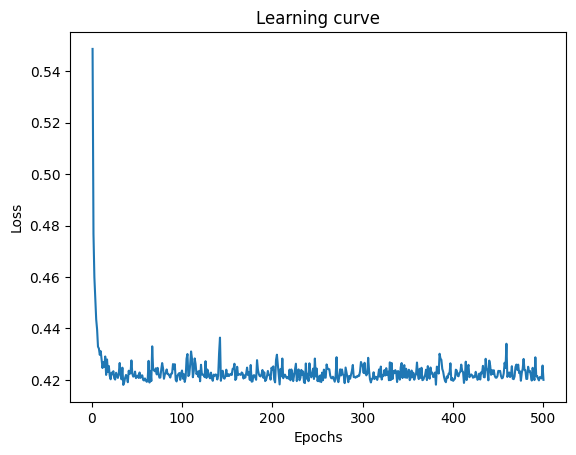

In [70]:
plt.plot(np.arange(1,501),his.history['loss'])
plt.title("Learning curve")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

In [71]:
predic = model.predict(xtrain)

25/25 [==============================] - 0s 1ms/step


In [72]:
predic[predic >= 0.5] = 1
predic[predic < 0.5] = 0

In [73]:
tp = np.sum((predic.T + ytrain) == 2 )
fp = np.sum((predic.T - ytrain) == -1)
tn = np.sum((predic.T + ytrain) == 0 )
fn = np.sum((predic.T - ytrain) == 1)

In [74]:
p = tp/(tp+fp)
r = tp/(tp+fn)
f1 = 2*p*r/(p+r)

#___RESULTS___

In [75]:
print("true positives on the test dataset : ",tp)
print("true negatives on the test dataset : ",tn)
print("false positives on the test dataset : ",fp)
print("false negatives on the test dataset : ",fn)
print("precision on the test dataset : ",p)
print("Recall on the test dataset : ",r)
print("Training loss : ",his.history['loss'][-1])
print("F1 score on the test dataset : ",f1)

true positives on the test dataset :  224
true negatives on the test dataset :  432
false positives on the test dataset :  82
false negatives on the test dataset :  54
precision on the test dataset :  0.7320261437908496
Recall on the test dataset :  0.8057553956834532
Training loss :  0.42001238465309143
F1 score on the test dataset :  0.7671232876712328


#___SMOTE___

In [147]:
df1c1 = df1[df1["Survived"] == 1]

In [148]:
df1c1.shape

(306, 15)

In [149]:
m = df1c1.mean(axis = 0)

In [150]:
for i in [0.75,0.8,0.85,0.9]:
  df1c2 =df1c1 - i*(df1c1 - m)
  df1c2["Sex"] = round(df1c2["Sex"])
  df1c2["Pclass_1"] = round(df1c2["Pclass_1"])
  df1c2["Pclass_2"] = round(df1c2["Pclass_2"])
  df1c2["Pclass_3"] = round(df1c2["Pclass_3"])
  df1c2["Title_1"] = round(df1c2["Title_1"])
  df1c2["Title_2"] = round(df1c2["Title_2"])
  df1c2["Title_3"] = round(df1c2["Title_3"])
  df1c2["Emb_1"] = round(df1c2["Emb_1"])
  df1c2["Emb_2"] = round(df1c2["Emb_2"])
  df1c2["Emb_3"] = round(df1c2["Emb_3"])
  df1c1 = pd.concat([df1c1,df1c2],axis = 0)

In [151]:
df1c1.shape

(4896, 15)

In [152]:
df10c1 = df1[df1["Survived"] == 0]

In [153]:
m = df10c1.mean(axis = 0)

In [154]:
for i in [0.85,0.9,0.95]:
  df10c2 =df10c1 - i*(df10c1 - m)
  df10c2["Sex"] = round(df10c2["Sex"])
  df10c2["Pclass_1"] = round(df10c2["Pclass_1"])
  df10c2["Pclass_2"] = round(df10c2["Pclass_2"])
  df10c2["Pclass_3"] = round(df10c2["Pclass_3"])
  df10c2["Title_1"] = round(df10c2["Title_1"])
  df10c2["Title_2"] = round(df10c2["Title_2"])
  df10c2["Title_3"] = round(df10c2["Title_3"])
  df10c2["Emb_1"] = round(df10c2["Emb_1"])
  df10c2["Emb_2"] = round(df10c2["Emb_2"])
  df10c2["Emb_3"] = round(df10c2["Emb_3"])
  df10c1 = pd.concat([df10c1,df10c2],axis = 0)

In [155]:
df10c1.shape

(3888, 15)

In [156]:
df3 = pd.concat([df1,df10c1,df1c1],axis = 0)

In [157]:
df3.head()

,Survived,Sex,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Family_size,Title_1,Title_2,Title_3,Title_4,Emb_1,Emb_2,Emb_3
0,0.0,1.0,0.2750,0.014151,0.0,0.0,1.0,0.1,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,0.0,0.4750,0.139136,1.0,0.0,0.0,0.1,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1.0,0.0,0.3250,0.015469,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,1.0,0.0,0.4375,0.103644,1.0,0.0,0.0,0.1,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,1.0,0.4375,0.015713,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [158]:
df3.shape

(9576, 15)

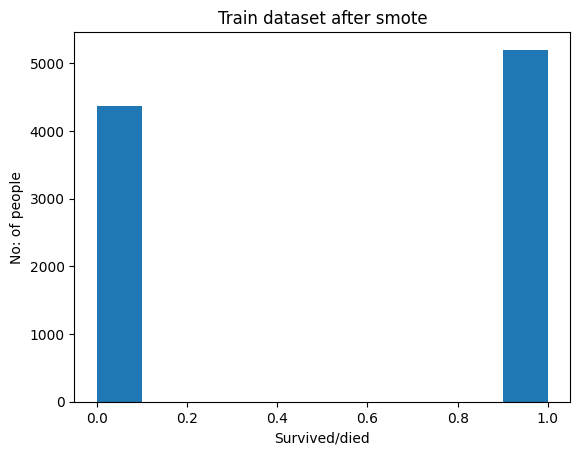

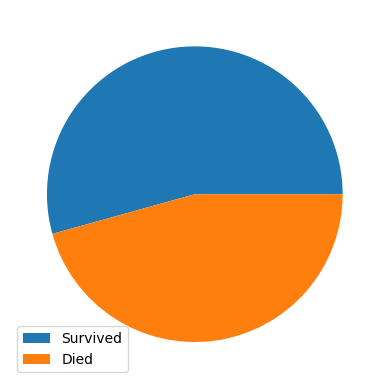

In [159]:
plt.hist(df3["Survived"])
plt.title("Train dataset after smote")
plt.xlabel("Survived/died")
plt.ylabel("No: of people")
plt.show()
plt.pie([np.sum(df3["Survived"]),df3.shape[0]-np.sum(df3["Survived"])])
plt.legend(["Survived","Died"])
plt.show()

#___RESULTS AFTER APPLYING SMOTE___

In [160]:
dfytest = df2["Survived"]
dfytrain = df3["Survived"]
dfxtrain = df3.drop(["Survived"],axis = 1)
dfxtest = df2.drop(["Survived"],axis = 1)
xtest = dfxtest.to_numpy()
xtrain = dfxtrain.to_numpy()
ytest = dfytest.to_numpy()
ytrain = dfytrain.to_numpy()

In [161]:
model = Sequential([
    Dense(1,activation = "sigmoid"),
])

In [162]:
model.compile(loss = 'binary_crossentropy', optimizer = Adam(0.05) )

In [163]:
xtrain.shape

(9576, 14)

In [164]:
his = model.fit(x = xtrain , y = ytrain , epochs = 500)

Epoch 1/500
300/300 [==============================] - 1s 1ms/step - loss: 0.1945
Epoch 2/500
300/300 [==============================] - 1s 2ms/step - loss: 0.1056
Epoch 3/500
300/300 [==============================] - 0s 2ms/step - loss: 0.0961
Epoch 4/500
300/300 [==============================] - 0s 2ms/step - loss: 0.0921
Epoch 5/500
300/300 [==============================] - 0s 2ms/step - loss: 0.0903
Epoch 6/500
300/300 [==============================] - 1s 2ms/step - loss: 0.0890
Epoch 7/500
300/300 [==============================] - 0s 2ms/step - loss: 0.0875
Epoch 8/500
300/300 [==============================] - 1s 2ms/step - loss: 0.0873
Epoch 9/500
300/300 [==============================] - 0s 2ms/step - loss: 0.0875
Epoch 10/500
300/300 [==============================] - 0s 2ms/step - loss: 0.0861
Epoch 11/500
300/300 [==============================] - 1s 2ms/step - loss: 0.0858
Epoch 12/500
300/300 [==============================] - 0s 2ms/step - loss: 0.0854
Epoch 13/500


In [165]:
pre = model.predict(xtest)

4/4 [==============================] - 0s 3ms/step


In [166]:
pre[pre >= 0.5] = 1
pre[pre < 0.5] = 0

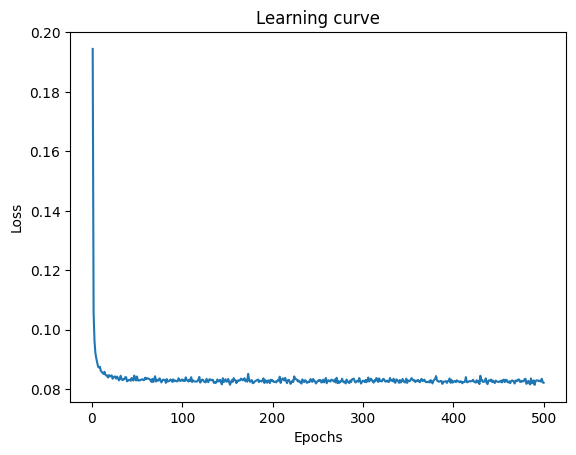

In [167]:
plt.plot(np.arange(1,501),his.history['loss'])
plt.title("Learning curve")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

In [168]:
tp = np.sum((pre.T + ytest) == 2 )
fp = np.sum((pre.T - ytest) == -1)
tn = np.sum((pre.T + ytest) == 0 )
fn = np.sum((pre.T - ytest) == 1)

In [169]:
p = tp/(tp+fp)
r = tp/(tp+fn)
f1 = 2*p*r/(p+r)

#___RESULTS AFTER SMOTE___

In [170]:
print("true positives on the test dataset : ",tp)
print("true negatives on the test dataset : ",tn)
print("false positives on the test dataset : ",fp)
print("false negatives on the test dataset : ",fn)
print("precision on the test dataset : ",p)
print("Recall on the test dataset : ",r)
print("Training loss  : ",his.history['loss'][-1])
print("F1 score on the test dataset : ",f1)

true positives on the test dataset :  29
true negatives on the test dataset :  58
false positives on the test dataset :  7
false negatives on the test dataset :  6
precision on the test dataset :  0.8055555555555556
Recall on the test dataset :  0.8285714285714286
Training loss  :  0.08213923871517181
F1 score on the test dataset :  0.8169014084507044
